In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

In [2]:
#import all required dataset
movies=pd.read_csv("movies.dat", sep='::', header=None, names= ['MovieID','Title','Genres'],engine='python')
users=pd.read_csv("users.dat", sep='::', header=None, names=['UserID','Gender','Age','Occupation','Zipcode'],engine='python')
ratings=pd.read_csv("ratings.dat", sep='::', header=None, names=['UserID','MovieID','Rating','Timestamp'],engine='python')

In [3]:
#view user data
users.head()

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
#view ratings data
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
#view movies data
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


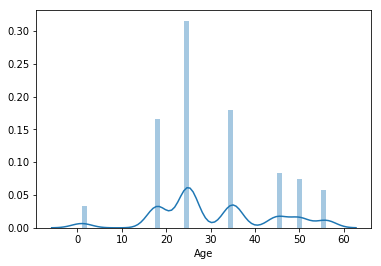

In [6]:
#Visualize user age distribution
sns.distplot(users['Age'])

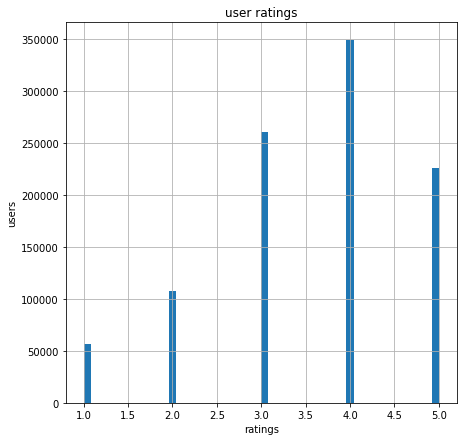

In [7]:
#Visualize overall rating by users
plot.figure(figsize=(7,7))
ratings['Rating'].hist(bins=50)
plot.title('user ratings')
plot.xlabel('ratings')
plot.ylabel('users')
plot.show()

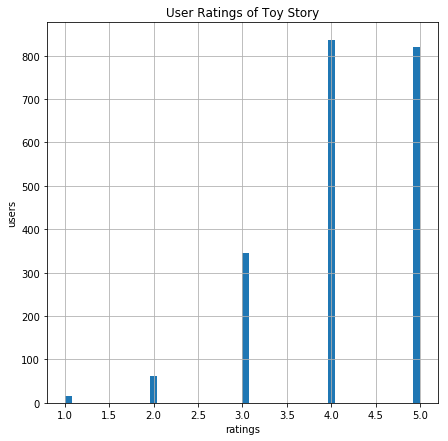

In [8]:
#Find and visualize the user rating of the movie “Toy Story”
toy_story_rating= ratings[ratings['MovieID']==1]

plot.figure(figsize=(7,7))
toy_story_rating['Rating'].hist(bins=50)
plot.title('User Ratings of Toy Story')
plot.xlabel('ratings')
plot.ylabel('users')
plot.show()

In [9]:
#Find and visualize the viewership of the movie “Toy Story” by age group
toy_story_users= toy_story_rating.merge(users)
toy_story_users.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,1,5,978824268,F,1,10,48067
1,6,1,4,978237008,F,50,9,55117
2,8,1,4,978233496,M,25,12,11413
3,9,1,5,978225952,M,25,17,61614
4,10,1,5,978226474,F,35,1,95370


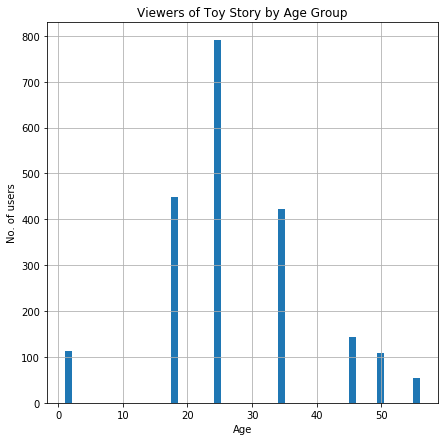

In [10]:
plot.figure(figsize=(7,7))
toy_story_users['Age'].hist(bins=50)
plot.title('Viewers of Toy Story by Age Group')
plot.xlabel('Age')
plot.ylabel('No. of users')
plot.show()

In [11]:
#Find and visualize the top 25 movies by viewership rating
movie_rating= movies.merge(ratings,on = 'MovieID')
movie_rating.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


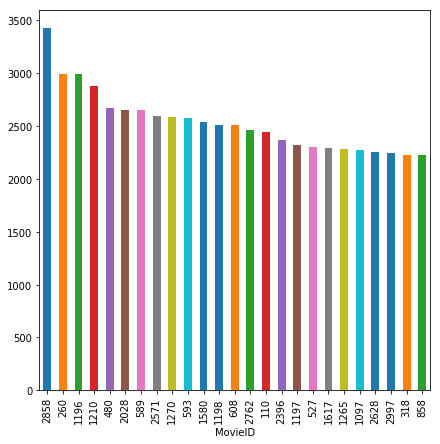

In [29]:
plot.figure(figsize=(7,7))
movie_rating.groupby('MovieID', axis=0).Rating.count().nlargest(25).plot(kind='bar')

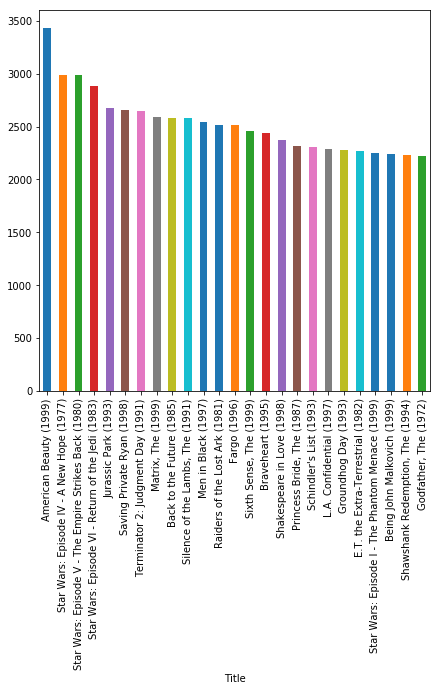

In [30]:
#Visualizing With Title
plot.figure(figsize=(7,7))
movie_rating.groupby('Title', axis=0).Rating.count().nlargest(25).plot(kind='bar')

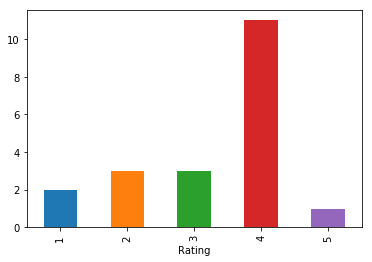

In [13]:
#Find and Visualize UserID = 2696
ratings[ratings.UserID == 2696].groupby('Rating').Rating.count().plot(kind='bar')

## Perform machine learning on first 500 extracted records
Use the following features:
1. movie id
2. age
3. occupation
>Use rating as label


In [14]:
#creating a combined data
combined_data= pd.merge(pd.merge(movies, ratings, on='MovieID'),users,on='UserID')
combined_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
#viewing all available columns in data
combined_data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode'],
      dtype='object')

In [16]:
#first 500 extracted records
data_500= combined_data.iloc[:500,[0,7,8,4]]
data_500.head()

,MovieID,Age,Occupation,Rating
0,1,1,10,5
1,48,1,10,5
2,150,1,10,5
3,260,1,10,4
4,527,1,10,5


In [17]:
#taking more data to improve score
data50k = combined_data.iloc[:50000,[0,2,6,7,8,4]]
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
data50k['Genres'] = X_labelencoder.fit_transform(data50k.values[:, 1])
data50k['Gender'] = X_labelencoder.fit_transform(data50k.values[:, 2])

In [18]:
#creating features and rating as label data
input_features=data50k.iloc[:, :-1].values
label = data50k.iloc[:,-1].values

In [19]:
#viewing data
input_features

array([[   1,  145,    0,    1,   10],
       [  48,  153,    0,    1,   10],
       [ 150,  237,    0,    1,   10],
       ...,
       [2858,  185,    1,   25,    7],
       [2890,  259,    1,   25,    7],
       [2959,  237,    1,   25,    7]], dtype=int64)

In [20]:
#Create train and test data set
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(input_features, label, test_size=0.25, random_state=1)

In [21]:
#Create ML Model
from sklearn.neighbors import KNeighborsClassifier
predictor = KNeighborsClassifier(n_neighbors=5)
predictor.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
print(predictor.score(X_train, y_train))

0.5359466666666667


In [23]:
print(predictor.score(X_test, y_test))

0.32168


In [24]:
#import accuracy score to check
from sklearn.metrics import accuracy_score
pred= predictor.predict(X_train)
print(accuracy_score(y_train, pred))

0.5359466666666667


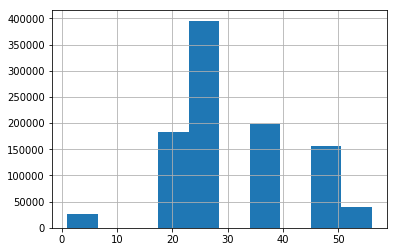

In [25]:
#Create a histogram for movie, age, and occupation
combined_data['Age'].hist()

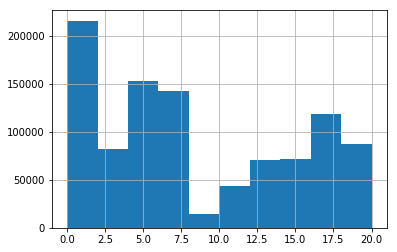

In [26]:
combined_data['Occupation'].hist()

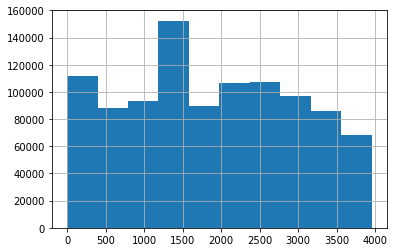

In [27]:
combined_data['MovieID'].hist()